In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
flights = pd.read_csv('https://media.githubusercontent.com/media/prathameshwalinu/Flight_Fare_Prediction/main/Cleaned_data.csv')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613643 entries, 0 to 7613642
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ItinID             int64  
 1   MktID              int64  
 2   MktCoupons         int64  
 3   Quarter            int64  
 4   Origin             object 
 5   OriginWac          int64  
 6   Dest               object 
 7   DestWac            int64  
 8   Miles              float64
 9   ContiguousUSA      int64  
 10  NumTicketsOrdered  float64
 11  AirlineCompany     object 
 12  PricePerTicket     float64
dtypes: float64(3), int64(7), object(3)
memory usage: 755.1+ MB


In [3]:
flights = flights.drop(['ItinID', 'MktCoupons', 'MktID'], axis=1)
flights

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,23,LAX,91,2402.0,2,3.0,AA,64.00
1,1,LAX,91,PHL,23,2402.0,2,2.0,AA,68.50
2,1,PHL,23,LAX,91,2402.0,2,2.0,AA,68.50
3,1,LAX,91,PHL,23,2402.0,2,3.0,AA,70.50
4,1,PHL,23,LAX,91,2402.0,2,3.0,AA,70.50
...,...,...,...,...,...,...,...,...,...,...
7613638,4,JFK,22,SFO,91,2586.0,2,1.0,AS,119.59
7613639,4,JFK,22,SFO,91,2586.0,2,1.0,AS,120.50
7613640,4,JFK,22,SFO,91,2586.0,2,1.0,AS,133.69
7613641,4,JFK,22,SFO,91,2586.0,2,1.0,AS,196.89


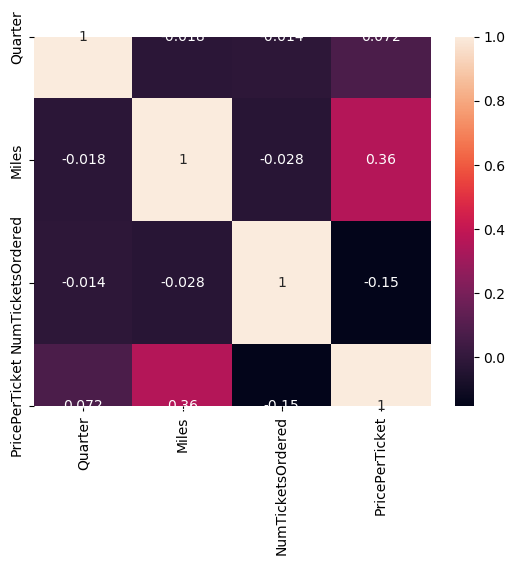

In [40]:
#Co-relation between features
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(flights.corr(),annot=True)

In [5]:
flights.nunique()

Quarter                  4
Origin                 276
OriginWac               53
Dest                   274
DestWac                 53
Miles                 2216
ContiguousUSA            2
NumTicketsOrdered       20
AirlineCompany          14
PricePerTicket       63364
dtype: int64

In [6]:
flights.isnull().sum()

Quarter              0
Origin               0
OriginWac            0
Dest                 0
DestWac              0
Miles                0
ContiguousUSA        0
NumTicketsOrdered    0
AirlineCompany       0
PricePerTicket       0
dtype: int64

In [7]:
# import seaborn as sns
# sns.pairplot(flights)

In [8]:
# import seaborn as sns
# x = flights['NumTicketsOrdered']
# sns.distplot(x)

In [9]:
flights['AirlineCompany'].value_counts()

WN    2277460
AA    1283771
DL    1202566
UA     931693
B6     567637
G4     376406
AS     376154
NK     252623
F9     159376
HA     114212
SY      40774
MX      17113
3M      10020
XP       3838
Name: AirlineCompany, dtype: int64

In [10]:
# import seaborn as sns
# y = flights['PricePerTicket']
# sns.distplot(y)

In [11]:
flights['PricePerTicket'].describe()

count    7.613643e+06
mean     2.121785e+02
std      1.391172e+02
min      5.000000e+01
25%      1.185000e+02
50%      1.765000e+02
75%      2.620000e+02
max      1.000000e+03
Name: PricePerTicket, dtype: float64

In [12]:
# import matplotlib.pyplot as plt
# plt.scatter(flights['PricePerTicket'], flights['Miles'])

In [13]:
# import seaborn as sns
# sns.regplot(x="Miles", y="PricePerTicket", data = flights)

In [14]:
!pip install category_encoders

In [15]:
flights = flights.drop(columns = ['OriginWac', 'DestWac', 'ContiguousUSA'])
flights

,Quarter,Origin,Dest,Miles,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,LAX,2402.0,3.0,AA,64.00
1,1,LAX,PHL,2402.0,2.0,AA,68.50
2,1,PHL,LAX,2402.0,2.0,AA,68.50
3,1,LAX,PHL,2402.0,3.0,AA,70.50
4,1,PHL,LAX,2402.0,3.0,AA,70.50
...,...,...,...,...,...,...,...
7613638,4,JFK,SFO,2586.0,1.0,AS,119.59
7613639,4,JFK,SFO,2586.0,1.0,AS,120.50
7613640,4,JFK,SFO,2586.0,1.0,AS,133.69
7613641,4,JFK,SFO,2586.0,1.0,AS,196.89


In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flights, train_size = 0.70, test_size = 0.30, random_state=42)

train, val = train_test_split(train, train_size = 0.50, test_size = 0.50, random_state=42)

train.shape, val.shape, test.shape

((2664775, 7), (2664775, 7), (2284093, 7))

In [17]:
target = ['PricePerTicket']
features = flights.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

In [18]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# import lightgbm as ltb
from sklearn.metrics import r2_score

#Encode the categoricals
encoder = OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.fit_transform(x_val)
x_test_encoded = encoder.fit_transform(x_test)

#RandomForest Regressor
pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_val)
print('RandomForest R^2 Score = ', r2_score(y_val, y_pred))


# LinearRegression Model
model2 = LinearRegression()
model2.fit(x_train_encoded, y_train)
y_pred2 = model2.predict(x_val_encoded)
print('LinearRegression R² Score = ', r2_score(y_val, y_pred2))

# RidgeRegression Model
model3 = Ridge()
model3.fit(x_train_encoded, y_train)
y_pred3 = model3.predict(x_val_encoded)
print('RidgeRegression R² Score = ', r2_score(y_val, y_pred3))

# LassoRegreession Model
model4 = Lasso()
model4.fit(x_train_encoded, y_train)
y_pred4 = model4.predict(x_val_encoded)
print('LassoRegression R² Score = ', r2_score(y_val,y_pred4))

# #LightGBM Model
# model5 = ltb.LGBMRegressor()
# model5.fit(x_train_encoded, y_train)
# y_pred5 = model5.predict(x_val_encoded)
# print('Light GBM R² Score = ', r2_score(y_val,y_pred5))

/Users/prathamesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RandomForest R^2 Score =  0.29457483608435975
LinearRegression R² Score =  0.1468268220332768
RidgeRegression R² Score =  0.14682682363609034
LassoRegression R² Score =  0.14716687642927107


In [19]:
import pickle

In [20]:
pickle.dump(pipeline, open('reg_model.pkl','wb'))

In [21]:
pickled_model = pickle.load(open('reg_model.pkl','rb'))
pickled_model.predict(x_test)

array([149.76836456, 199.4155491 , 246.06079689, ..., 169.37588339,
       164.85918826, 193.92818922])

In [22]:
pickled_model.predict(x_test)


array([149.76836456, 199.4155491 , 246.06079689, ..., 169.37588339,
       164.85918826, 193.92818922])

In [23]:
print(x_test.iloc[1])

Quarter                  2
Origin                 CLT
Dest                   ORD
Miles                599.0
NumTicketsOrdered      2.0
AirlineCompany          AA
Name: 2378344, dtype: object


In [24]:
data = {
    'Quarter': 2,
    'Origin': 'CLT',
    'Dest': 'ORD',
    'Miles': 599.0,
    'NumTicketsOrdered': 2.0,
    'AirlineCompany': 'AA'
}

In [25]:
df = pd.DataFrame(data, index=[0])
df.head()

,Quarter,Origin,Dest,Miles,NumTicketsOrdered,AirlineCompany
0,2,CLT,ORD,599.0,2.0,AA


In [26]:
pickled_model.predict(df)

array([199.4155491])

NameError: name 'model' is not defined